# 3. Human Hematopoiesis (scRNAseq)

In [3]:
import pyVIA.core as via
import datasets_via as datasets
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load data
We use annotations given by SingleR which uses Novershtern Hematopoietic cell data as the reference. These are in line with the annotations given by Setty et al., 2019 but offer a slightly more granular annotation.

In [4]:
# 5780 cells x 14651 genes Human Replicate 1. Male african american, 38 years
#ad = sc.read( '/home/shobi/Trajectory/Datasets/HumanCD34/human_cd34_bm_rep1.h5ad')

adata = datasets.scRNA_hematopoiesis() #TODO CHANGE THIS FUNCTION TO be the rep1.h5ad file and then just add in the Nover labels. 
sc.tl.pca(adata, svd_solver='arpack', n_comps=200)
tsnem = adata.obsm['tsne']
adata

Cell type mDC (cDC) has  96 cells
Cell type PRE_B2 has  515 cells
Cell type B_a4 has  8 cells
Cell type MEGA1 has  12 cells
Cell type BASO1 has  2 cells
Cell type ERY3 has  104 cells
Cell type pDC has  204 cells
Cell type MONO1 has  186 cells
Cell type PRE_B3 has  2 cells
Cell type GRAN1 has  3 cells
Cell type ERY2 has  40 cells
Cell type B_a2 has  1 cells
Cell type MONO2 has  35 cells
Cell type ERY1 has  773 cells
Cell type CMP has  968 cells
Cell type GMP has  28 cells
Cell type EOS2 has  3 cells
Cell type B_a1 has  27 cells
Cell type HSC2 has  10 cells
Cell type HSC1 has  2365 cells
Cell type Nka3 has  5 cells
Cell type TCEL7 has  1 cells
Cell type MEP has  339 cells
Cell type ERY4 has  53 cells


### Run VIA 
This is the first iteration for coarse grained view. 

It should be noted that VIA can be run in two iterations where the first iteration is a coarser (larger clusters) analysis which is useful to get a more concise list of terminal states and high-level overview of the trajectory. A second more fine-grained (smaller clusters) run can be subsequently conducted which uses the terminal states (lineages) detected in the initial run and refines the overall pseudotime and lineage probabilities. 

Good results can be achieved by using either the single run approach (where the solo run can be as fine or coarse grained as desired) or using the two-run approach. It is a matter of data size, characteristics and can be left to the user's discretion. 
All visualizations and analysis of genes, lineage pathways and so on can be extracted after a single run, as well as after a two-run approach. 



In [7]:
ncomps=100#80
knn=30
v0_random_seed=4
root_user = [4823] #the index of a cell belonging to the HSC cell type
dataset = '' 

'''
#Note, if you decide to choose a cell type as a root, then you need to set the dataset as 'group'
#root_user=['HSC1']
#dataset = 'group'# 'humanCD34'
'''

v0 = via.VIA(data=adata.obsm['X_pca'][:, 0:ncomps], true_label= adata.obs['label'], jac_std_global=0.15, dist_std_local=1, knn=knn,
     too_big_factor=0.3,     root_user=root_user, dataset=dataset, preserve_disconnected=True, random_seed=v0_random_seed,
is_coarse=True,pseudotime_threshold_TS=20, neighboring_terminal_states_threshold=3)

v0.run_VIA()

2022-11-02 22:08:43.640777	Running VIA over input data of 5780 (samples) x 100 (features)
2022-11-02 22:08:43.640979	Knngraph has 30 neighbors


2022-11-02 22:08:47.289492	Finished global pruning of 30-knn graph used for clustering. Kept 45.8 % of edges. 
2022-11-02 22:08:47.320569	Number of connected components used for clustergraph  is 1


2022-11-02 22:08:47.668341	The number of components in the original full graph is 1
2022-11-02 22:08:47.668429	For downstream visualization purposes we are also constructing a low knn-graph 


2022-11-02 22:08:51.665551	Commencing community detection


2022-11-02 22:08:51.955505	Finished running Leiden algorithm. Found 162 clusters.
2022-11-02 22:08:51.957890	Merging 145 very small clusters (<10)
2022-11-02 22:08:51.961729	Finished detecting communities. Found 17 communities
2022-11-02 22:08:51.962326	Making cluster graph. Global cluster graph pruning level: 0.15
2022-11-02 22:08:51.982196	Graph has 1 connected components before pruning
2022-11-02 22:08:51.983748	Graph has 1 connected components before pruning
2022-11-02 22:08:51.984815	Graph has 1 connected components after reconnecting
2022-11-02 22:08:51.984980	0.0% links trimmed from local pruning relative to start
2022-11-02 22:08:51.985010	63.2% links trimmed from global pruning relative to start
2022-11-02 22:08:51.986939	Starting make edgebundle viagraph...
2022-11-02 22:08:51.986973	Make via clustergraph edgebundle


2022-11-02 22:08:52.205259	Hammer dims: Nodes shape: (17, 2) Edges shape: (68, 3)
2022-11-02 22:08:52.230285	The root index, 4823 provided by the user belongs to cluster number 2 and corresponds to cell type HSC1
2022-11-02 22:08:52.232490	Computing lazy-teleporting expected hitting times


2022-11-02 22:08:52.868063	Identifying terminal clusters corresponding to unique lineages...
2022-11-02 22:08:52.868247	Closeness:[5, 6, 7, 9, 11, 16]
2022-11-02 22:08:52.868291	Betweenness:[1, 2, 5, 7, 9, 11, 13, 14, 16]
2022-11-02 22:08:52.868322	Out Degree:[2, 4, 5, 8, 9, 11, 13, 14, 16]
2022-11-02 22:08:52.870687	Terminal clusters corresponding to unique lineages in this component are [5, 7, 9, 11, 13, 14, 16] 


2022-11-02 22:08:53.189825	From root 2,  the Terminal state 5 is reached 6 times.


2022-11-02 22:08:53.557642	From root 2,  the Terminal state 7 is reached 47 times.


2022-11-02 22:08:53.917613	From root 2,  the Terminal state 9 is reached 29 times.


2022-11-02 22:08:54.243807	From root 2,  the Terminal state 11 is reached 92 times.


2022-11-02 22:08:54.473280	From root 2,  the Terminal state 13 is reached 498 times.


2022-11-02 22:08:54.701172	From root 2,  the Terminal state 14 is reached 500 times.


2022-11-02 22:08:55.033211	From root 2,  the Terminal state 16 is reached 44 times.
2022-11-02 22:08:55.064176	Terminal clusters corresponding to unique lineages are [5, 7, 9, 11, 13, 14, 16] 
2022-11-02 22:08:55.064288	Begin projection of pseudotime and lineage likelihood


2022-11-02 22:08:56.430132	Graph has 1 connected components before pruning
2022-11-02 22:08:56.431492	Graph has 1 connected components before pruning
2022-11-02 22:08:56.434136	Graph has 1 connected components after reconnecting
2022-11-02 22:08:56.434317	53.7% links trimmed from local pruning relative to start
2022-11-02 22:08:56.434356	76.1% links trimmed from global pruning relative to start
2022-11-02 22:08:56.436286	Starting make edgebundle milestone...
2022-11-02 22:08:56.446128	Time elapsed 11.4 seconds


##Plot the Via graph for cluster level trajectory

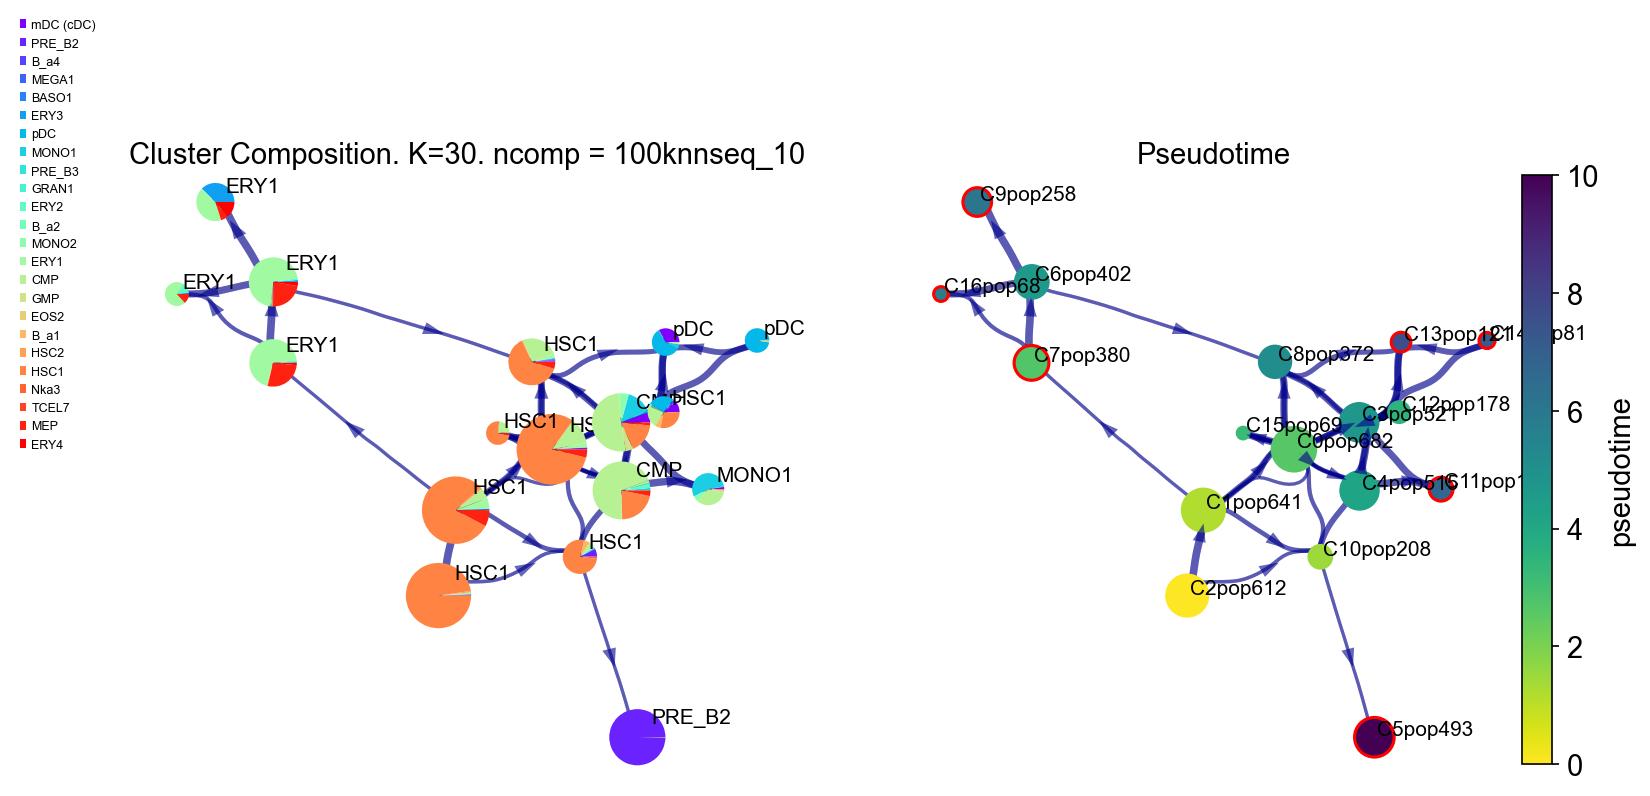

In [8]:
fig, ax, ax1 = via.draw_piechart_graph(via0=v0)
fig.set_size_inches(12,5)

### VIA Gene Graph 
View the gene expression along the VIA graph. We use the computed HNSW small world graph in VIA to accelerate the gene imputation calculations (using similar approach to MAGIC) as follows:

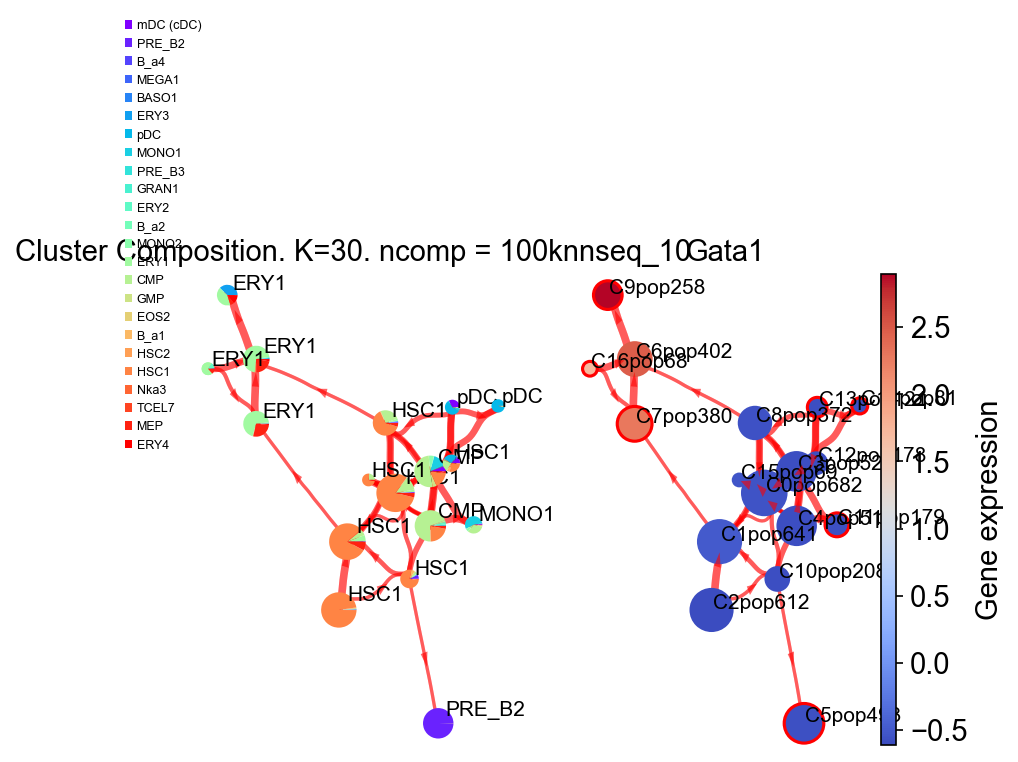

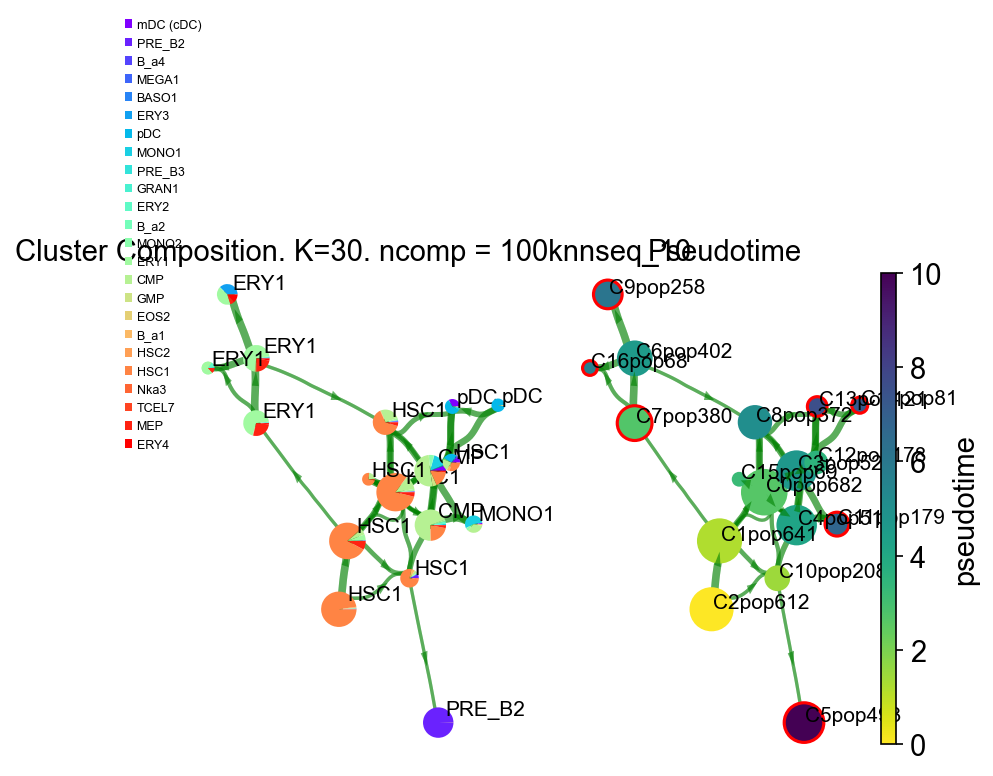

In [11]:
df_ = pd.DataFrame(adata.X)
df_.columns = [i for i in adata.var_names]

gene_list_magic = ['IL3RA', 'IRF8', 'GATA1', 'GATA2', 'ITGA2B', 'MPO', 'CD79B', 'SPI1', 'CD34', 'CSF1R', 'ITGAX']
df_magic = v0.do_impute(df_, magic_steps=3, gene_list=gene_list_magic)
df_magic['parc'] = v0.labels
df_magic_cluster = df_magic.groupby('parc', as_index=True).mean()

# Draw_piechart plots both the cell type composition as well as a clustergraph colored by pseudotime or gene expression
fig, ax, ax1 = via.draw_piechart_graph(via0=v0,type_data='gene', gene_exp=df_magic_cluster['GATA1'].values, title='Gata1', edge_color='red')
fig, ax, ax1 = via.draw_piechart_graph(via0=v0,type_data='pt', title='pseudotime', edge_color='green')



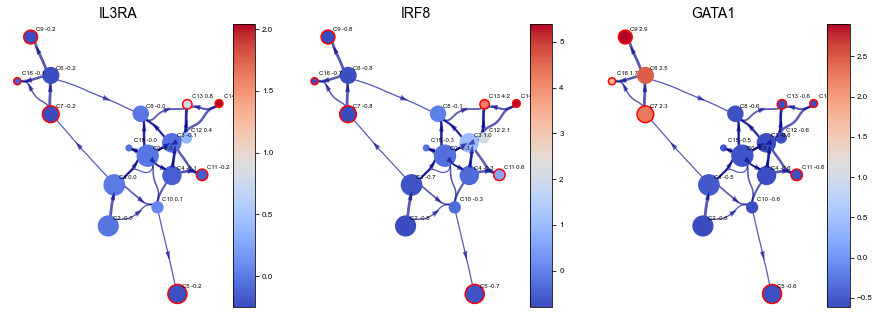

In [12]:

# Draw_clustergraph does not plot the pie-graph clutsergraph and accepts a dataframe as input. Here we plot just the first three genes in the gene_list_magic list
fig, axs = via.draw_clustergraph(via_object=v0, type_data='gene', gene_exp=df_magic_cluster, gene_list=gene_list_magic[0:3], arrow_head=0.1)
fig.set_size_inches(15,5)


### Visualization

Visualize the overall VIA trajectory projected onto a 2D embedding (UMAP, Phate, TSNE etc) in different ways. 

1. Draw the high-level clustergraph abstraction onto the embedding;
2. Draws a vector field plot of the more fine-grained directionality of cells along the trajectory projected onto an embedding. 
3. Draw high-edge resolution directed graph

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:  00:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:  00:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:  00:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

2022-11-02 22:12:25.642356	Super cluster 5 is a super terminal with sub_terminal cluster 5
2022-11-02 22:12:25.642485	Super cluster 7 is a super terminal with sub_terminal cluster 7
2022-11-02 22:12:25.642540	Super cluster 9 is a super terminal with sub_terminal cluster 9
2022-11-02 22:12:25.642591	Super cluster 11 is a super terminal with sub_terminal cluster 11
2022-11-02 22:12:25.642642	Super cluster 13 is a super terminal with sub_terminal cluster 13
2022-11-02 22:12:25.642691	Super cluster 14 is a super terminal with sub_terminal cluster 14
2022-11-02 22:12:25.642743	Super cluster 16 is a super terminal with sub_terminal cluster 16


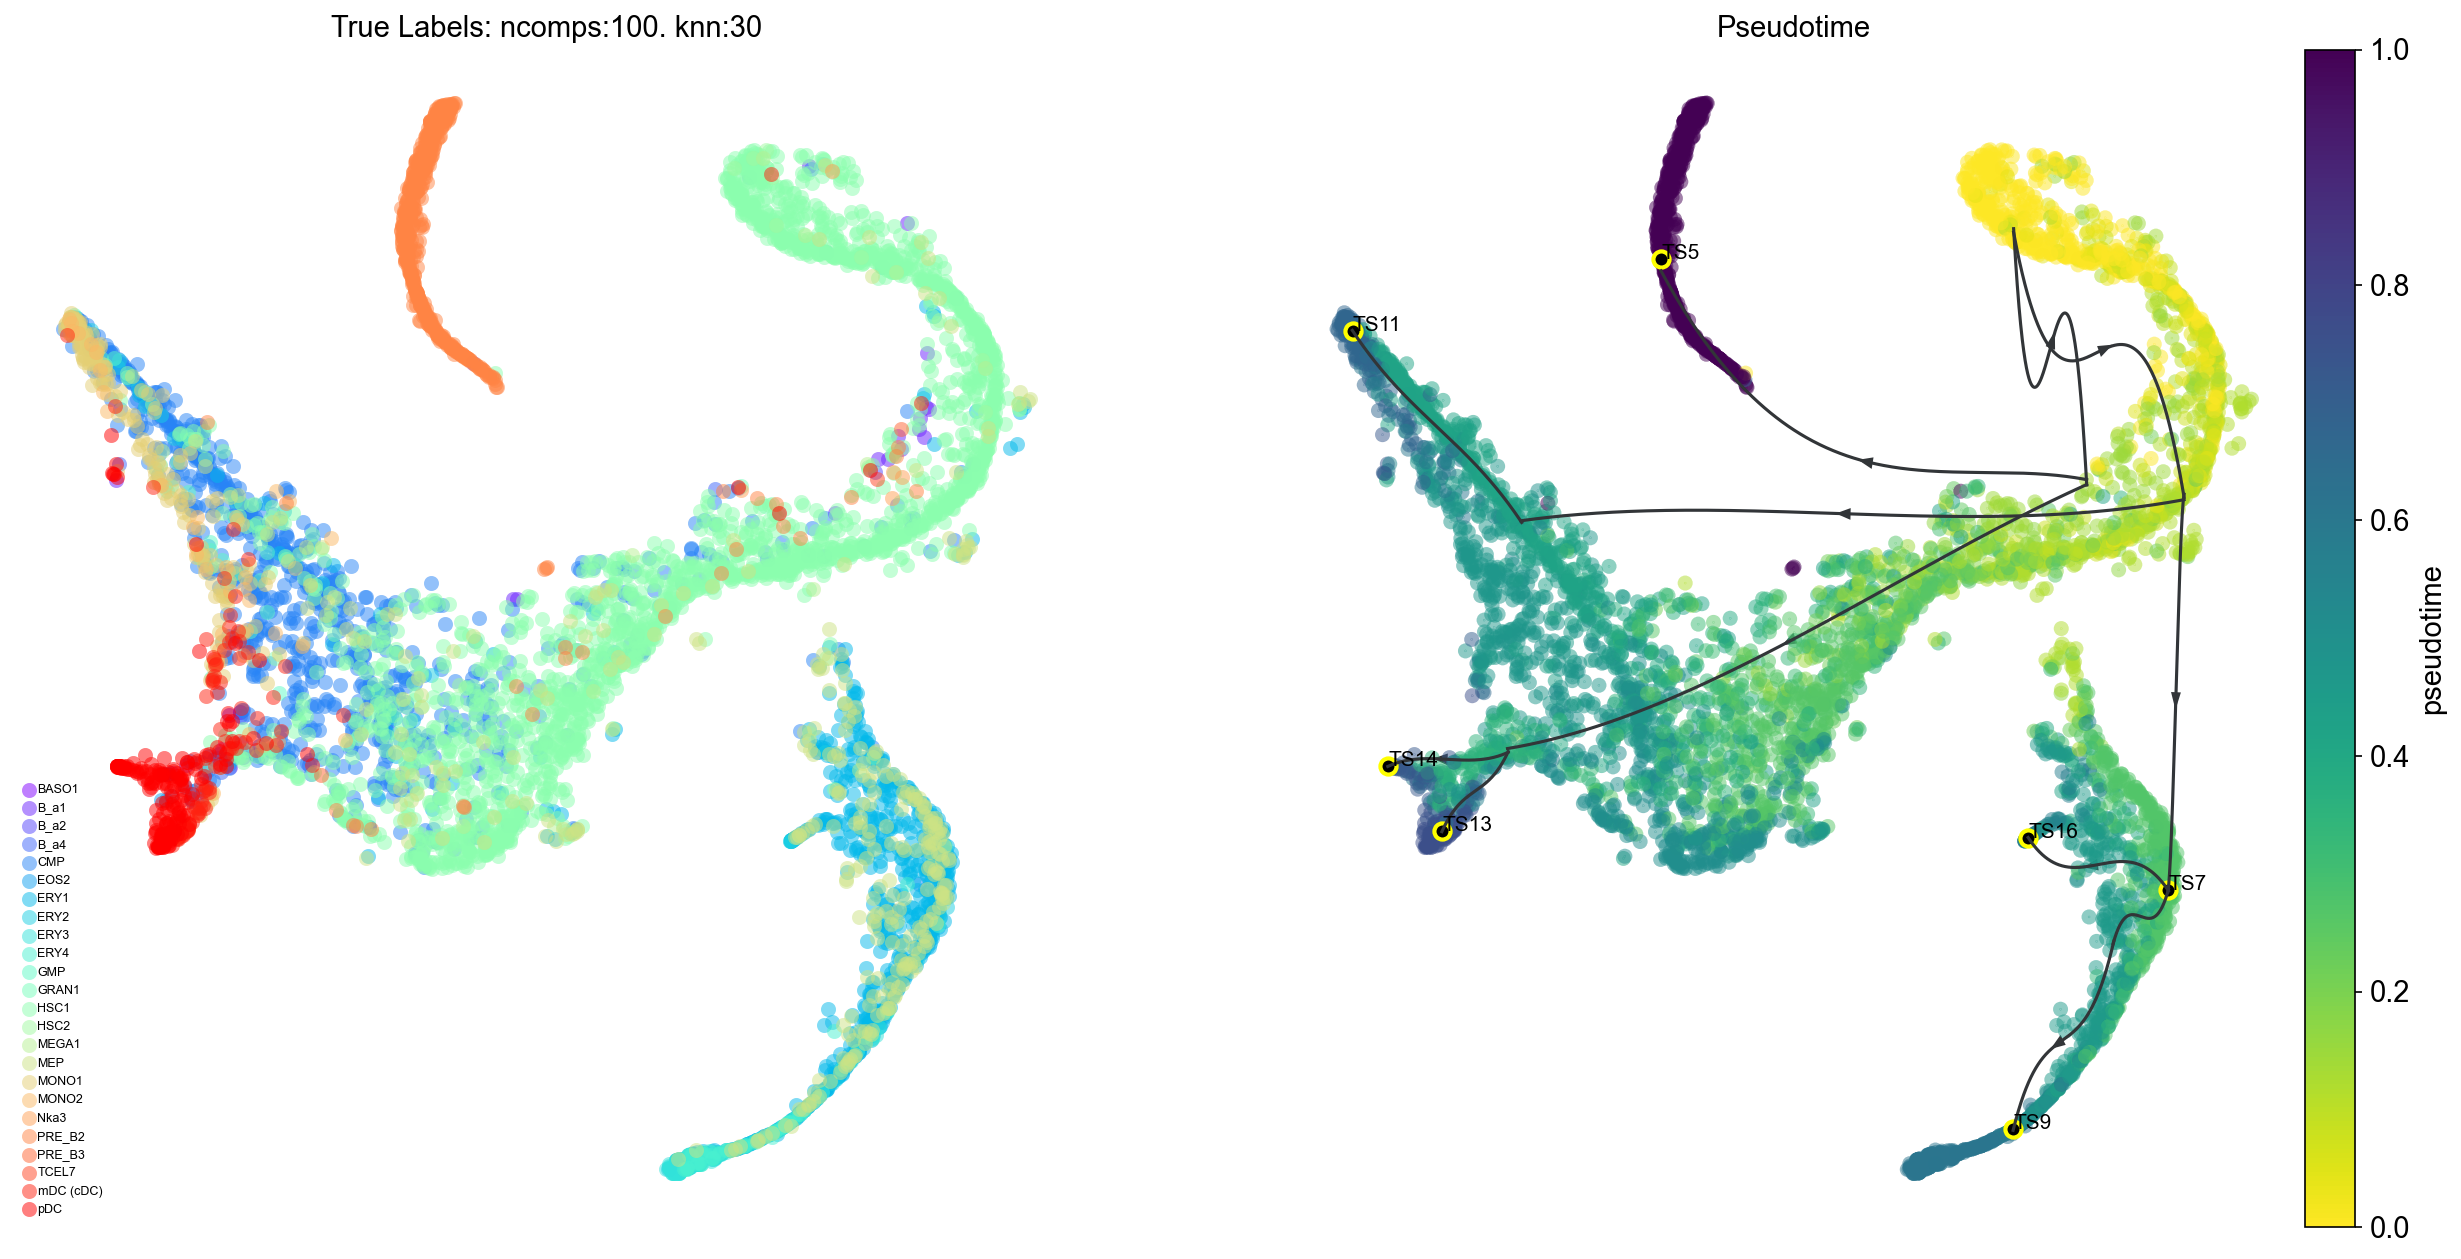

In [13]:
fig, ax, ax1 = via.draw_trajectory_gams(via_coarse=v0,via_fine= v0,embedding=tsnem, draw_all_curves=False)

'\n##In case we are unable to do a tsne/umap of our entire dataset due to high runtime, it is possible to visualize Via (run on the full dataset) on a subset of cells used for visualization. One simply has to retain the indexes of the cells used for the embedding \n##by changing "size" to a number less than len(labels), you can choose to compute your embedding on just idx samples\nidx = np.random.randint(len(v0.labels), size=len(v0.labels)) \n\nvia.draw_trajectory_gams(via_coarse=v0, via_fine=v0, embedding=tsnem[idx], idx = idx, draw_all_curves=False)\n\n##visualizeLINEAGE EVOLUTION PATHS when only a subset of the embedding points are available\n\nvia.draw_sc_evolution_trajectory_dijkstra(via_coarse=v0, via_fine=v0, embedding=tsnem[idx], idx = idx)\n'

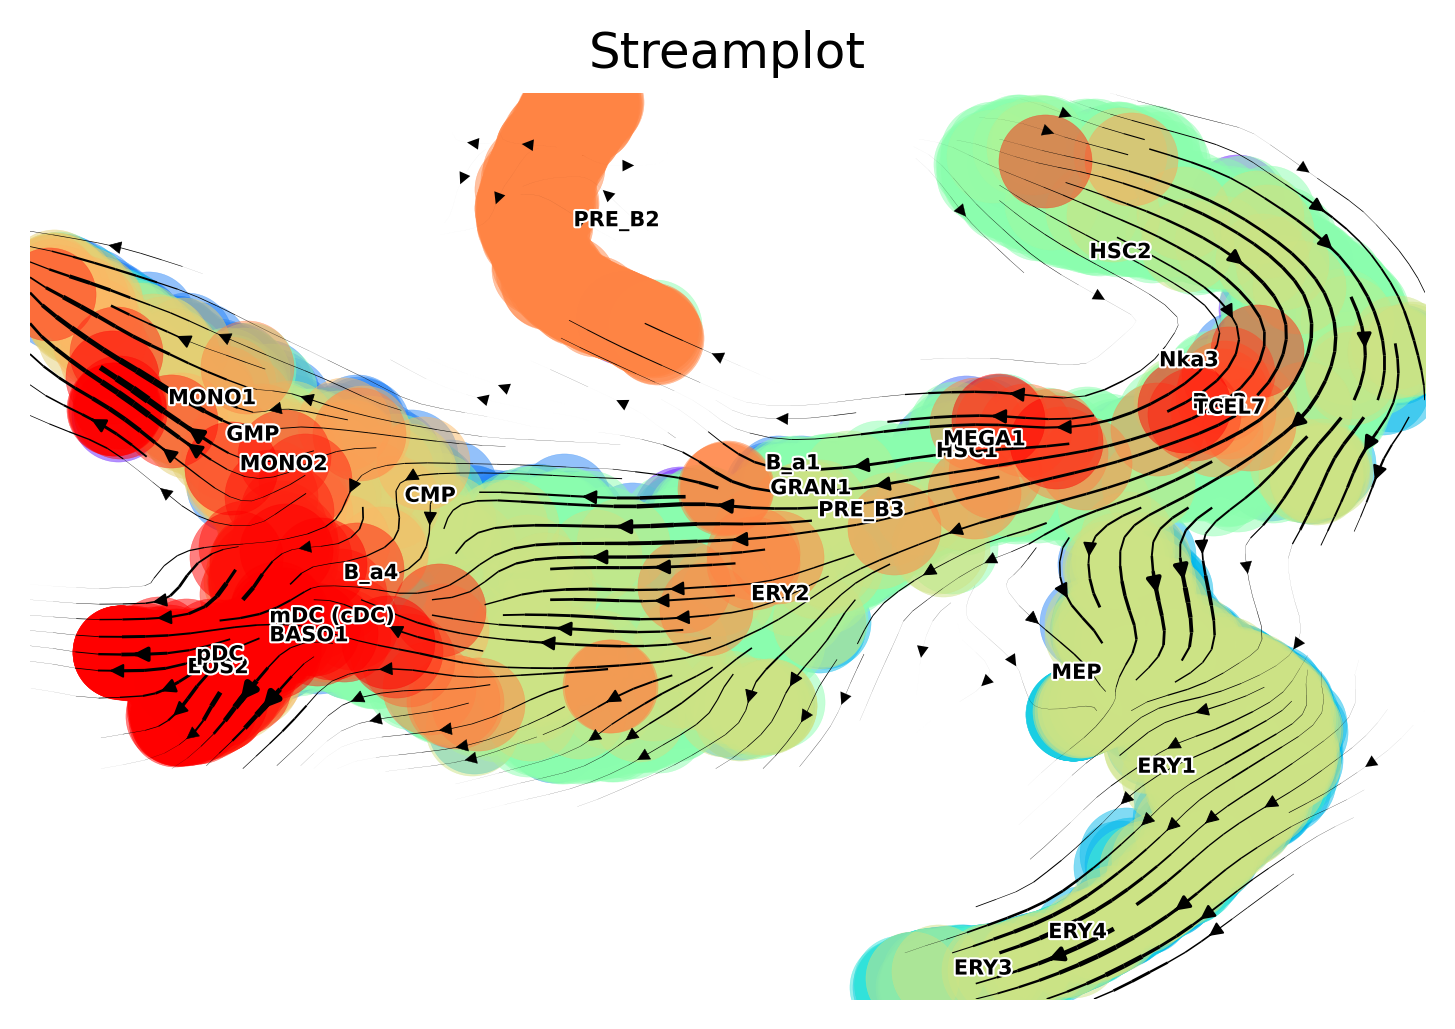

In [15]:

fig, ax = via.via_streamplot(via_coarse=v0, embedding=tsnem)


'''
##In case we are unable to do a tsne/umap of our entire dataset due to high runtime, it is possible to visualize Via (run on the full dataset) on a subset of cells used for visualization. One simply has to retain the indexes of the cells used for the embedding 
##by changing "size" to a number less than len(labels), you can choose to compute your embedding on just idx samples
idx = np.random.randint(len(v0.labels), size=len(v0.labels)) 

via.draw_trajectory_gams(via_coarse=v0, via_fine=v0, embedding=tsnem[idx], idx = idx, draw_all_curves=False)

##visualizeLINEAGE EVOLUTION PATHS when only a subset of the embedding points are available

via.draw_sc_evolution_trajectory_dijkstra(via_coarse=v0, via_fine=v0, embedding=tsnem[idx], idx = idx)
'''

2022-07-12 10:21:31.779190	Inside animated. File will be saved to location /home/shobi/Trajectory/Datasets/HumanCD34/HumanCD34_animation.gif


  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

total number of stream lines 432


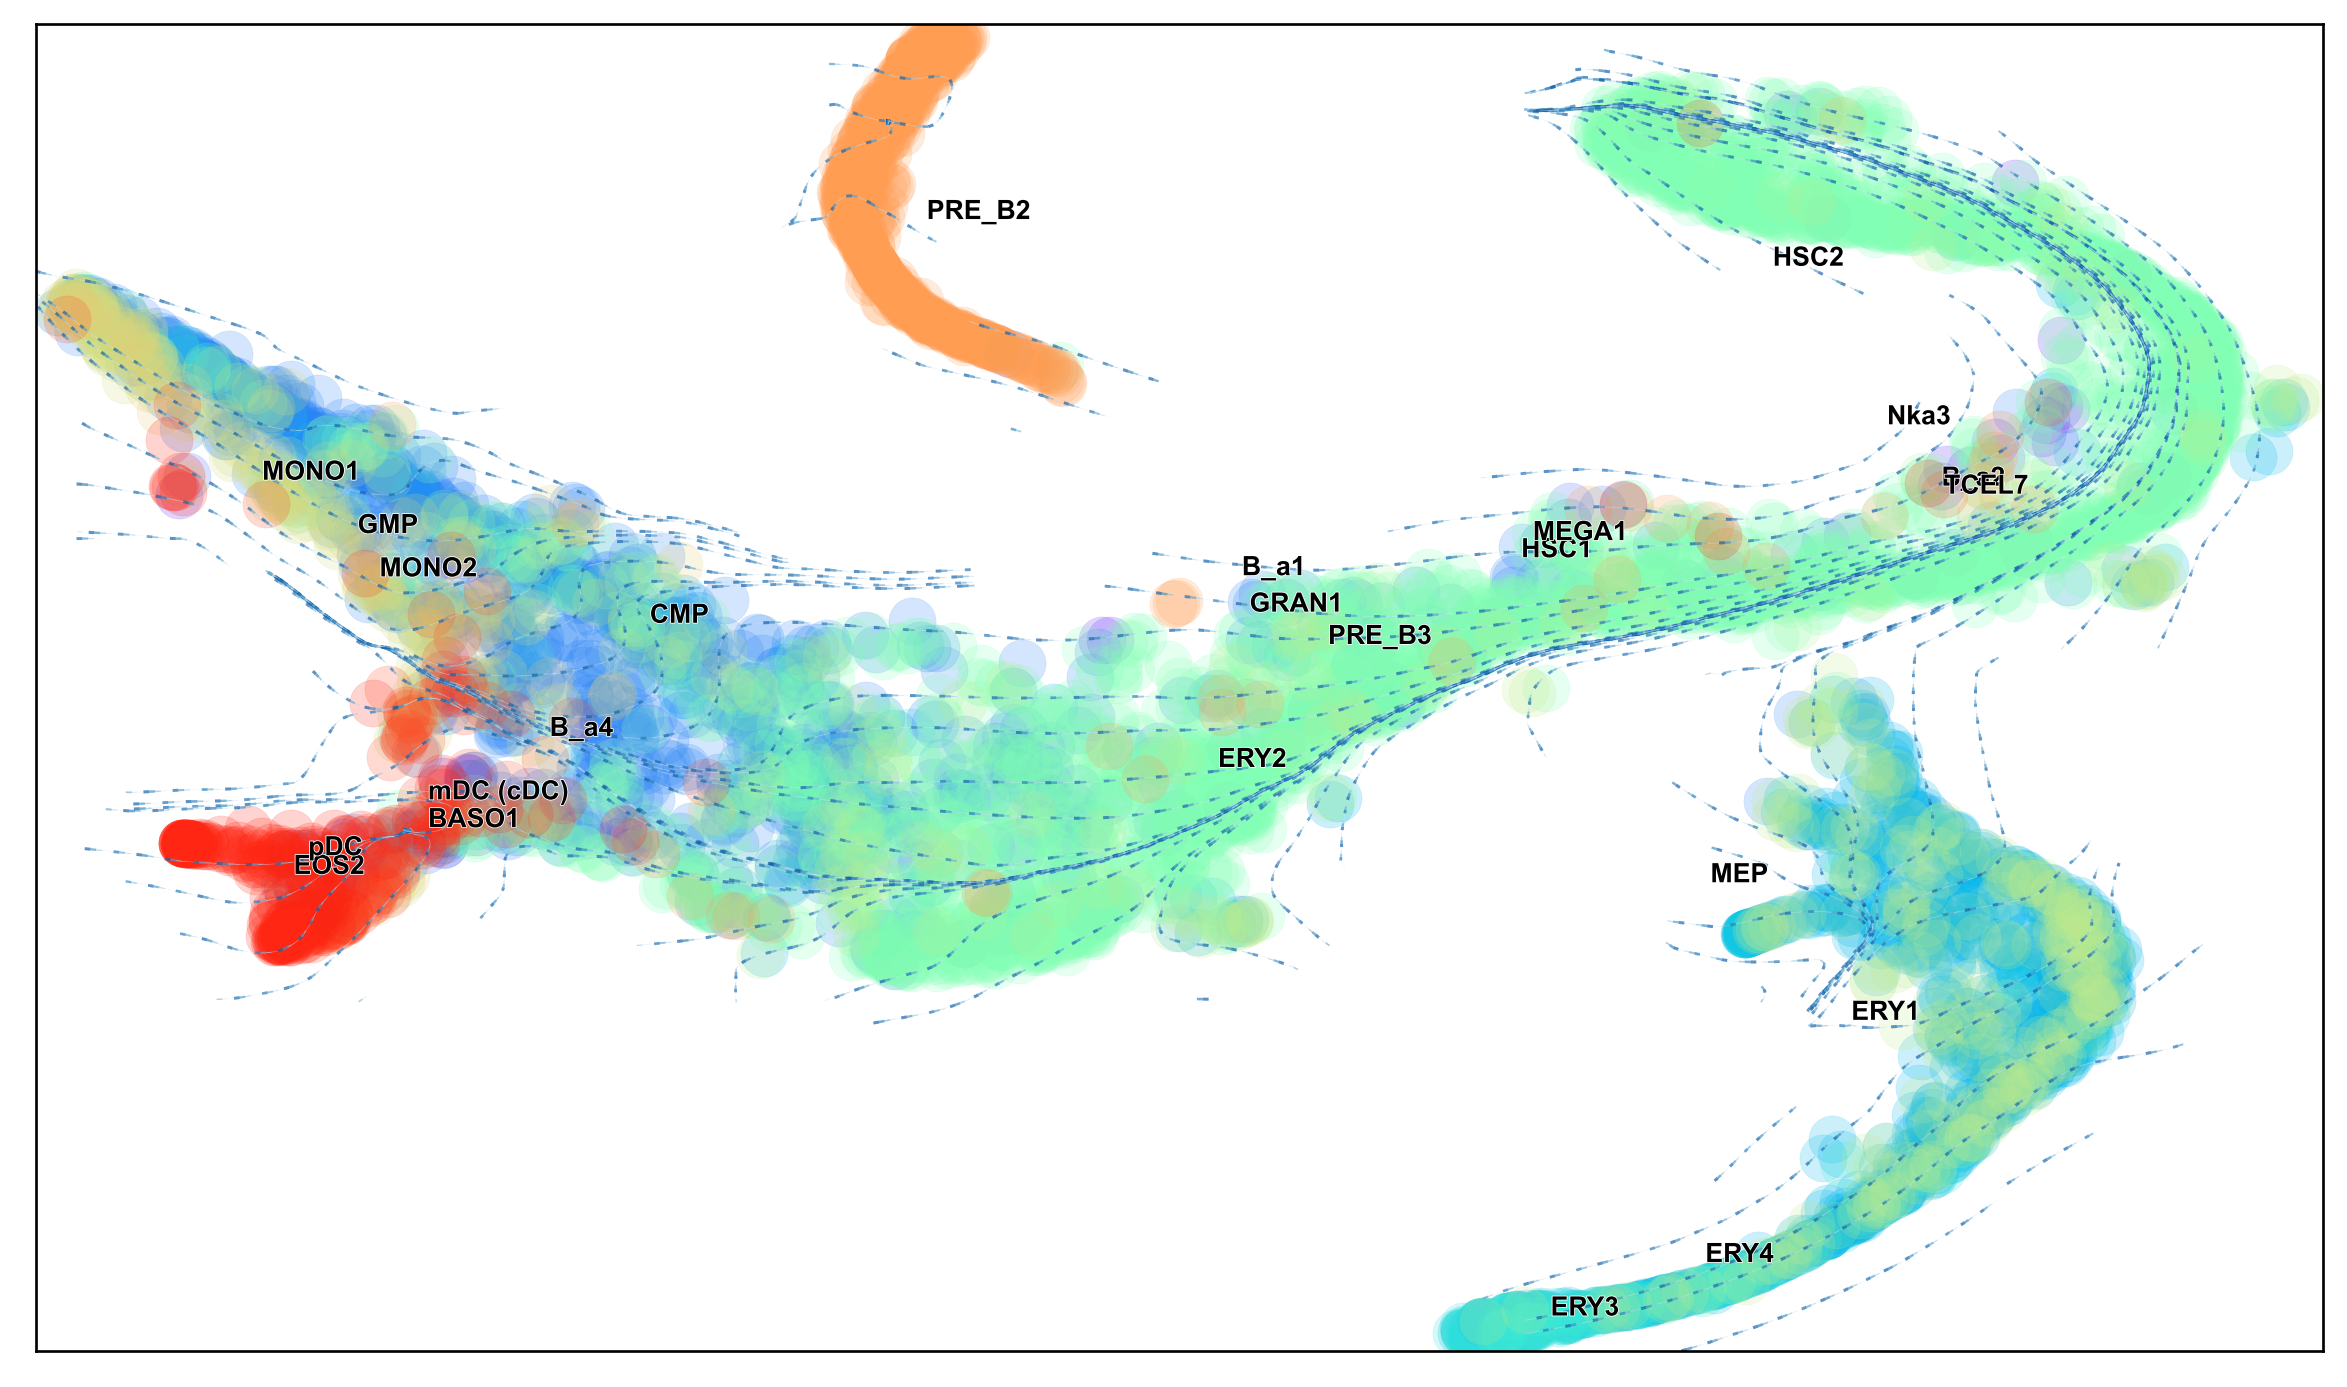

In [5]:
sc.settings.set_figure_params(dpi=120, facecolor='white')
via.animated_streamplot(v0, embedding=tsnem, scatter_size=200, scatter_alpha=0.2,marker_edgewidth=0.15, density_grid=1, saveto='/home/shobi/Trajectory/Datasets/HumanCD34/HumanCD34_animation.gif')

In [11]:
from IPython.display import Image
with open('.../HumanCD34/HumanCD34_animation.gif','rb') as file:
    display(Image(file.read()))


**The animation file does not open up on the notebook as its 7.5MB, but you can view it [here](https://github.com/ShobiStassen/VIA/blob/master/Figures/HumanCD34_animation.gif?raw=true)**

## Visualization of edges at high resolution
(Takes a few minutes)
#### Key Parameters:
- alpha_bundle_factor=1
- linewidth_bundle=2
- cmap:str = 'plasma_r'
- size_scatter:int=2
- alpha_scatter:float = 0.2 
- headwidth_bundle=0.1

making hammerbundle
2022-11-02 22:14:12.726404	Start kmeans milestone


2022-11-02 22:14:22.767155	End kmeans milestone
2022-11-02 22:14:22.796873	Recompute weights
2022-11-02 22:14:22.979879	pruning milestone graph based on recomputed weights
2022-11-02 22:14:22.984792	Graph has 1 connected components before pruning


2022-11-02 22:14:22.986008	Graph has 1 connected components before pruning
2022-11-02 22:14:22.993400	regenerate igraph on pruned edges


2022-11-02 22:14:23.410201	make node dataframe
2022-11-02 22:14:23.414889	Setting numeric label as time_series_labels or other sequential metadata for coloring edges
2022-11-02 22:14:23.517662	Hammer bundling


number of segments 44978
[-18.448  -1.259]


[-13.388  -1.517]


[-11.259  -2.505]


[ -5.774 -10.14 ]


[-8.803 -6.787]


2022-11-02 22:16:29.513934	Finished plotting edge bundle


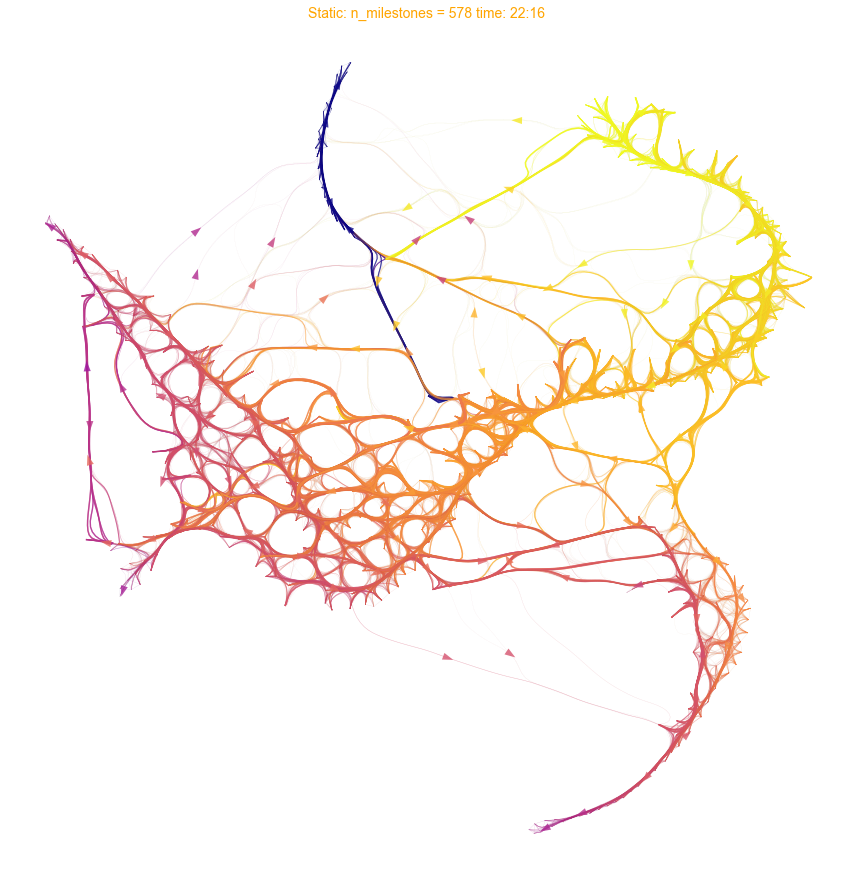

In [16]:
v0.embedding = tsnem#OR add it directly when you initialize via0 

fig, ax = via.plot_edge_bundle(via_object=v0, headwidth_bundle=0.5) 
fig.set_size_inches(15,15)

## Change the resolution of edge drawing


2022-11-02 22:19:33.251316	Start kmeans milestone


2022-11-02 22:19:41.393081	End kmeans milestone
2022-11-02 22:19:41.415894	Recompute weights
2022-11-02 22:19:41.429641	pruning milestone graph based on recomputed weights
2022-11-02 22:19:41.430574	Graph has 1 connected components before pruning
2022-11-02 22:19:41.430893	Graph has 1 connected components before pruning
2022-11-02 22:19:41.431831	regenerate igraph on pruned edges
2022-11-02 22:19:41.436221	make node dataframe
2022-11-02 22:19:41.440028	Setting numeric label as single cell pseudotime for coloring edges
2022-11-02 22:19:41.466237	Hammer bundling


number of segments 3206
[  9.047 -27.381]


2022-11-02 22:19:46.926566	Finished plotting edge bundle


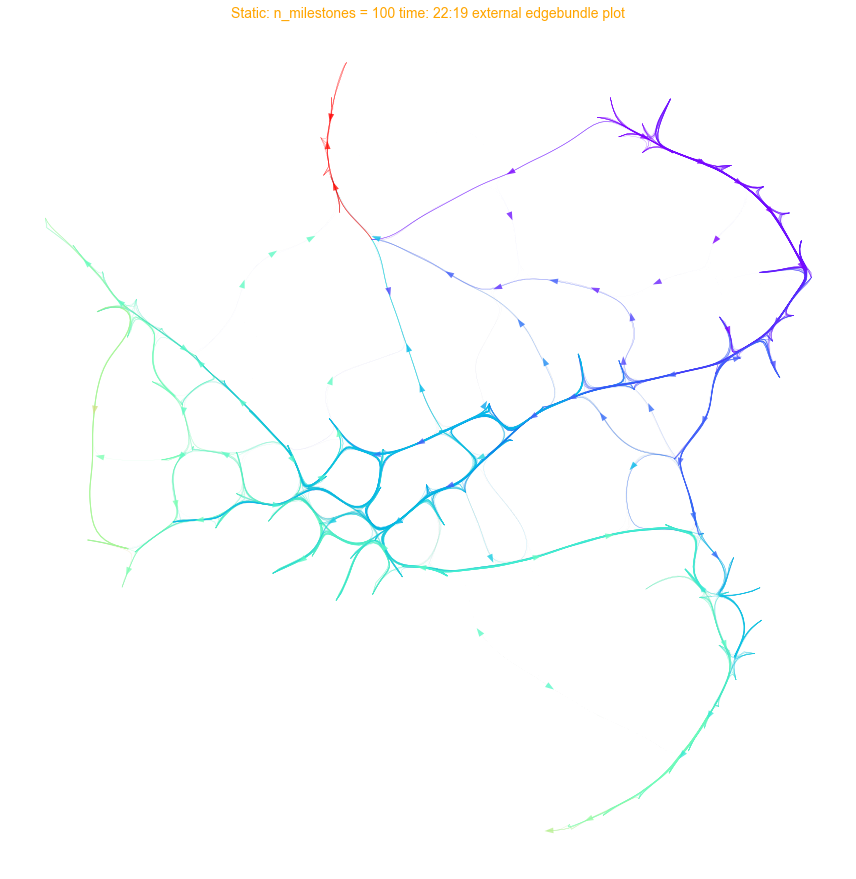

In [18]:
hammerbundle_milestone_dict = via.make_edgebundle_milestone(via_object=v0, global_visual_pruning=0.5, decay=0.7, initial_bandwidth=0.05, n_milestones=100)

fig, ax=via.plot_edge_bundle(hammerbundle_dict=hammerbundle_milestone_dict,
                     linewidth_bundle=1.5, alpha_bundle_factor=2,
                     cmap='rainbow', facecolor='white', size_scatter=15, alpha_scatter=0.2,
                     extra_title_text='external edgebundle plot', headwidth_bundle=0.4)
fig.set_size_inches(15,15)

### Probabilistic pathways
Visualize the probabilistic pathways from root to terminal state as indicated by the lineage likelihood. The higher the linage likelihood, the greater the potential of that particular cell to differentiate towards the terminal state of interest. 

2022-11-02 14:56:23.581731	Cluster path on clustergraph starting from Root Cluster 2to Terminal Cluster 5
2022-11-02 14:56:23.581837	Cluster path on clustergraph starting from Root Cluster 2to Terminal Cluster 6
2022-11-02 14:56:23.581859	Cluster path on clustergraph starting from Root Cluster 2to Terminal Cluster 9
2022-11-02 14:56:23.581875	Cluster path on clustergraph starting from Root Cluster 2to Terminal Cluster 11
2022-11-02 14:56:23.581892	Cluster path on clustergraph starting from Root Cluster 2to Terminal Cluster 13
2022-11-02 14:56:23.581908	Cluster path on clustergraph starting from Root Cluster 2to Terminal Cluster 14
2022-11-02 14:56:23.581929	Cluster path on clustergraph starting from Root Cluster 2to Terminal Cluster 16
2022-11-02 14:56:23.698571	Cluster level path on sc-knnGraph from Root Cluster 2 to Terminal Cluster 1 along path: [2, 2, 2, 2, 1]
2022-11-02 14:56:23.724464	Cluster level path on sc-knnGraph from Root Cluster 2 to Terminal Cluster 2 along path: [2]
2022

2022-11-02 14:56:23.801335	Cluster level path on sc-knnGraph from Root Cluster 2 to Terminal Cluster 5 along path: [2, 2, 2, 2, 10, 5, 5, 5, 5, 5, 5]
2022-11-02 14:56:23.826024	Cluster level path on sc-knnGraph from Root Cluster 2 to Terminal Cluster 6 along path: [2, 2, 2, 2, 7, 6, 6, 6]
2022-11-02 14:56:23.852108	Cluster level path on sc-knnGraph from Root Cluster 2 to Terminal Cluster 7 along path: [2, 2, 2, 1, 7, 6, 6]


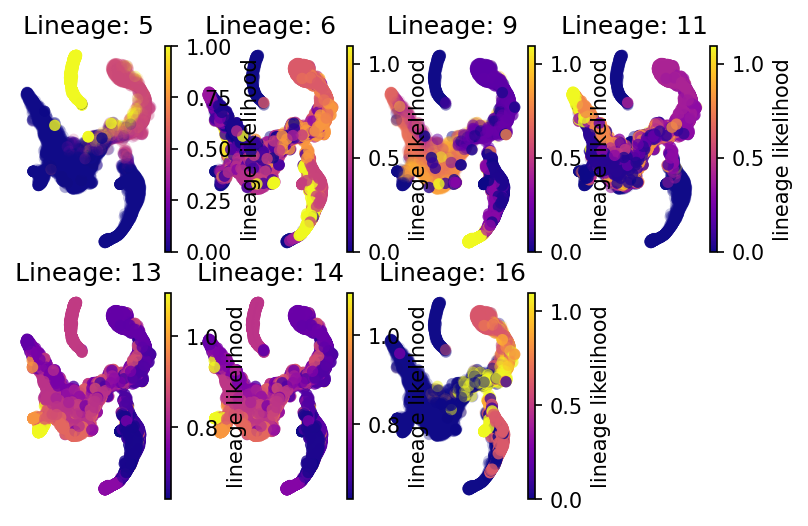

In [18]:
fig, axs= via.draw_sc_lineage_probability(via_coarse=v0,via_fine= v0, embedding=tsnem)

### Gene Dynamics
The gene dynamics along pseudotime for all detected lineages are automatically inferred by VIA. These can be interpreted as the change in gene expression along any given lineage.

(<Figure size 900x600 with 8 Axes>,
 array([[<AxesSubplot:title={'center':'ITGA2B'}>,
         <AxesSubplot:title={'center':'IL3RA'}>,
         <AxesSubplot:title={'center':'IRF8'}>,
         <AxesSubplot:title={'center':'MPO'}>],
        [<AxesSubplot:title={'center':'CSF1R'}>,
         <AxesSubplot:title={'center':'GATA2'}>,
         <AxesSubplot:title={'center':'CD79B'}>,
         <AxesSubplot:title={'center':'CD34'}, xlabel='Time', ylabel='Intensity'>]],
       dtype=object))

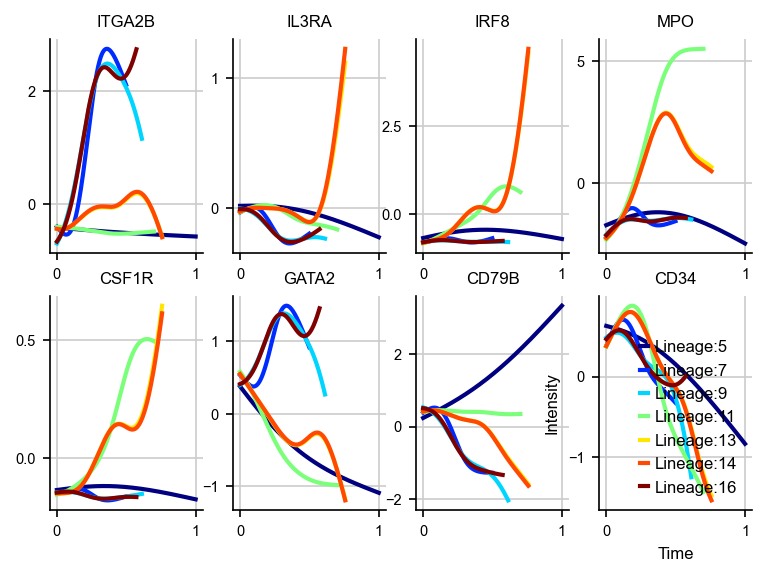

In [22]:
gene_name_dict = {'GATA1': 'GATA1', 'GATA2': 'GATA2', 'ITGA2B': 'CD41 (Mega)', 'MPO': 'MPO (Mono)',
                      'CD79B': 'CD79B (B)', 'IRF8': 'IRF8 (DC)', 'SPI1': 'PU.1', 'CD34': 'CD34',
                      'CSF1R': 'CSF1R (cDC Up. Up then Down in pDC)', 'IL3RA': 'CD123 (pDC)', 'IRF4': 'IRF4 (pDC)',
                      'ITGAX': 'ITGAX (cDCs)', 'CSF2RA': 'CSF2RA (cDC)'}
adata_counts_raw = sc.AnnData(adata.raw.X) #raw counts
adata_counts_raw.var_names = [i for i in adata.var_names]
df_ = pd.DataFrame(adata_counts_raw.X.todense())

df_.columns = [i for i in adata_counts_raw.var_names]
marker_genes =[ 'ITGA2B', 'IL3RA',      'IRF8',   'MPO', 'CSF1R', 'GATA2', 'CD79B',             'CD34']
fig, axs=via.get_gene_expression(via0=v0, gene_exp=df_magic[marker_genes])
fig.set_size_inches(15,7)

### Optional Second Iteration
We show how to run a second iteration and link it to the first. 
In this case, our second iteration would have a finer grained clustering to refine the pseudotime and lineage probabilities but use the terminal lineage states detected in the coarser run (v0).
The main difference is that we reduce the too_big_factor and we set via_coarse = v0

2022-06-13 13:42:19.882168	Running VIA over input data of 5780 (samples) x 100 (features)


2022-06-13 13:42:22.104812	Finished global pruning of 30-knn graph used for clustering. Kept 45.8 % of edges. 
2022-06-13 13:42:22.104922	Commencing community detection


2022-06-13 13:42:22.401189	Finished running Leiden algorithm. Found 162 clusters.
2022-06-13 13:42:22.402660	Found 9 clusters that are too big
2022-06-13 13:42:22.402679	Examining clusters that are above the too_big threshold
2022-06-13 13:42:22.402719	Cluster 7 contains 380>289 samples and is too big
2022-06-13 13:42:22.474350	Examining clusters that are above the too_big threshold
2022-06-13 13:42:22.474432	Cluster 2 contains 554>289 samples and is too big
2022-06-13 13:42:22.594133	Examining clusters that are above the too_big threshold
2022-06-13 13:42:22.594461	Cluster 8 contains 372>289 samples and is too big


2022-06-13 13:42:22.660011	Examining clusters that are above the too_big threshold
2022-06-13 13:42:22.660127	Cluster 6 contains 402>289 samples and is too big
2022-06-13 13:42:22.730708	Examining clusters that are above the too_big threshold
2022-06-13 13:42:22.730801	Cluster 1 contains 584>289 samples and is too big
2022-06-13 13:42:22.855416	Examining clusters that are above the too_big threshold
2022-06-13 13:42:22.855524	Cluster 0 contains 653>289 samples and is too big


2022-06-13 13:42:22.998851	Examining clusters that are above the too_big threshold
2022-06-13 13:42:22.998936	Cluster 3 contains 517>289 samples and is too big
2022-06-13 13:42:23.094470	Examining clusters that are above the too_big threshold
2022-06-13 13:42:23.094554	Cluster 4 contains 513>289 samples and is too big
2022-06-13 13:42:23.195782	Examining clusters that are above the too_big threshold
2022-06-13 13:42:23.195877	Cluster 5 contains 492>289 samples and is too big


2022-06-13 13:42:23.303100	Merging 145 very small clusters (<10)
2022-06-13 13:42:23.307243	Finished detecting communities. Found 51 communities
2022-06-13 13:42:23.308326	Making cluster graph. Global cluster graph pruning level: 0.15
2022-06-13 13:42:23.384891	Graph has 1 connected components before pruning
2022-06-13 13:42:23.388001	Graph has 1 connected components before pruning n_nonz 13 30
2022-06-13 13:42:23.389434	Graph has 1 connected components after reconnecting
2022-06-13 13:42:23.389661	2.6% links trimmed from local pruning relative to start
2022-06-13 13:42:23.389695	70.6% links trimmed from global pruning relative to start


2022-06-13 13:42:23.802243	The root index, 4823 provided by the user belongs to cluster number 12                                  and corresponds to cell type HSC1
2022-06-13 13:42:23.806312	Computing lazy-teleporting expected hitting times


no sub cluster has majority made of super-cluster  9
2022-06-13 13:42:25.327761	Terminal clusters corresponding to unique lineages in this component are [49, 27, 0, 2, 4, 5, 7] 


2022-06-13 13:42:25.886723	From root 12,  the Terminal state 49 is reached 5 times.


2022-06-13 13:42:26.401741	From root 12,  the Terminal state 27 is reached 95 times.


2022-06-13 13:42:26.888222	From root 12,  the Terminal state 0 is reached 105 times.


2022-06-13 13:42:27.151693	From root 12,  the Terminal state 2 is reached 475 times.


2022-06-13 13:42:27.614632	From root 12,  the Terminal state 4 is reached 184 times.


2022-06-13 13:42:28.127820	From root 12,  the Terminal state 5 is reached 98 times.


2022-06-13 13:42:28.696672	From root 12,  the Terminal state 7 is reached 26 times.
2022-06-13 13:42:28.727990	Terminal clusters corresponding to unique lineages are [49, 27, 0, 2, 4, 5, 7] 
2022-06-13 13:42:28.728107	Begin projection of pseudotime and lineage likelihood


2022-06-13 13:42:30.099199	Graph has 1 connected components before pruning
2022-06-13 13:42:30.102675	Graph has 2 connected components before pruning n_nonz 2 2
2022-06-13 13:42:30.112905	Graph has 2 connected components after reconnecting
2022-06-13 13:42:30.113352	68.2% links trimmed from local pruning relative to start
2022-06-13 13:42:30.113475	81.6% links trimmed from global pruning relative to start


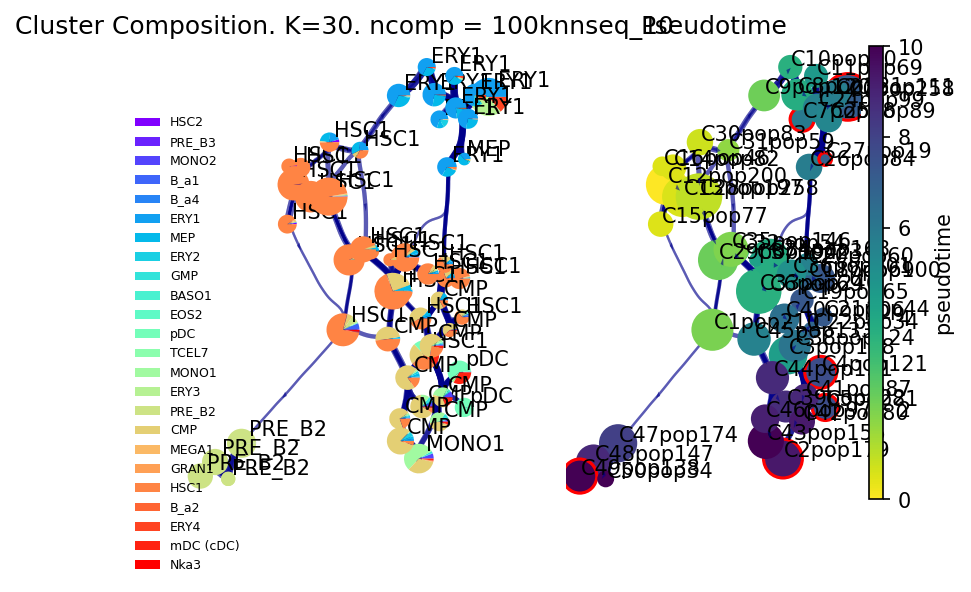

2022-06-13 13:42:33.826649	Time elapsed 12.6 seconds


In [10]:
v1 = via.VIA(adata_counts.obsm['X_pca'][:, 0:ncomps], true_label, jac_std_global=0.15, dist_std_local=1, knn=knn,
             too_big_factor=0.05, root_user=root_user,
             x_lazy=0.95, alpha_teleport=0.99, dataset='', preserve_disconnected=True,
             super_terminal_clusters=v0.terminal_clusters, is_coarse=False,
             random_seed=v0_random_seed, pseudotime_threshold_TS=10, via_coarse=v0)
v1.run_VIA()

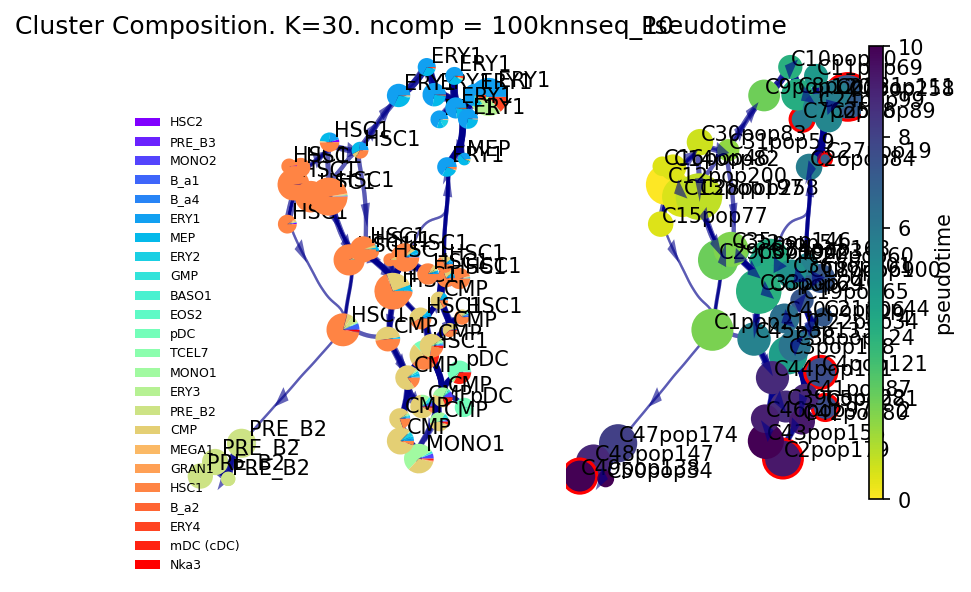

In [14]:
v1.draw_piechart_graph(headwidth_arrow=0.3)

**Gene Trends** We show the gene trends as a function of pseudotime for a selection of marker genes

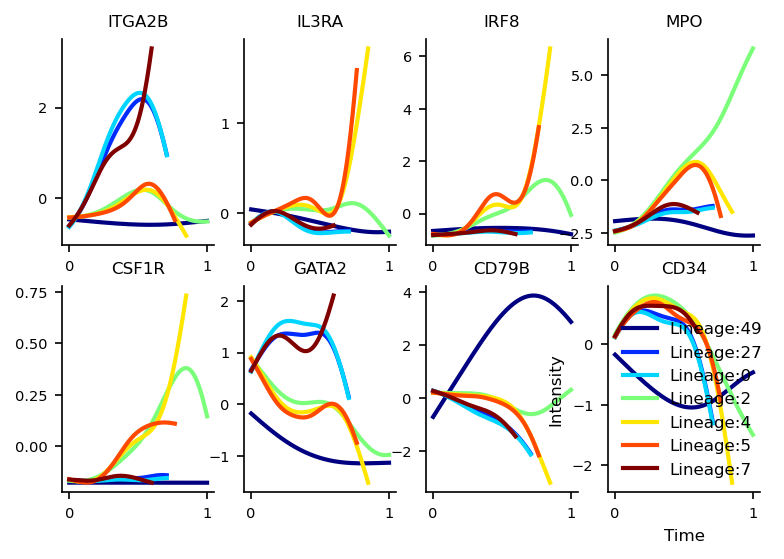

In [17]:
v1.get_gene_expression(df_magic[marker_genes])

dict of terminal state pairs, Super: sub:  {5: 50, 6: 27, 9: 0, 11: 2, 13: 4, 14: 5, 16: 7}


N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:  00:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:  00:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

super cluster 5 is a super terminal with sub_terminal cluster 50
super cluster 6 is a super terminal with sub_terminal cluster 27
super cluster 9 is a super terminal with sub_terminal cluster 0
super cluster 11 is a super terminal with sub_terminal cluster 2
super cluster 13 is a super terminal with sub_terminal cluster 4
super cluster 14 is a super terminal with sub_terminal cluster 5
super cluster 16 is a super terminal with sub_terminal cluster 7


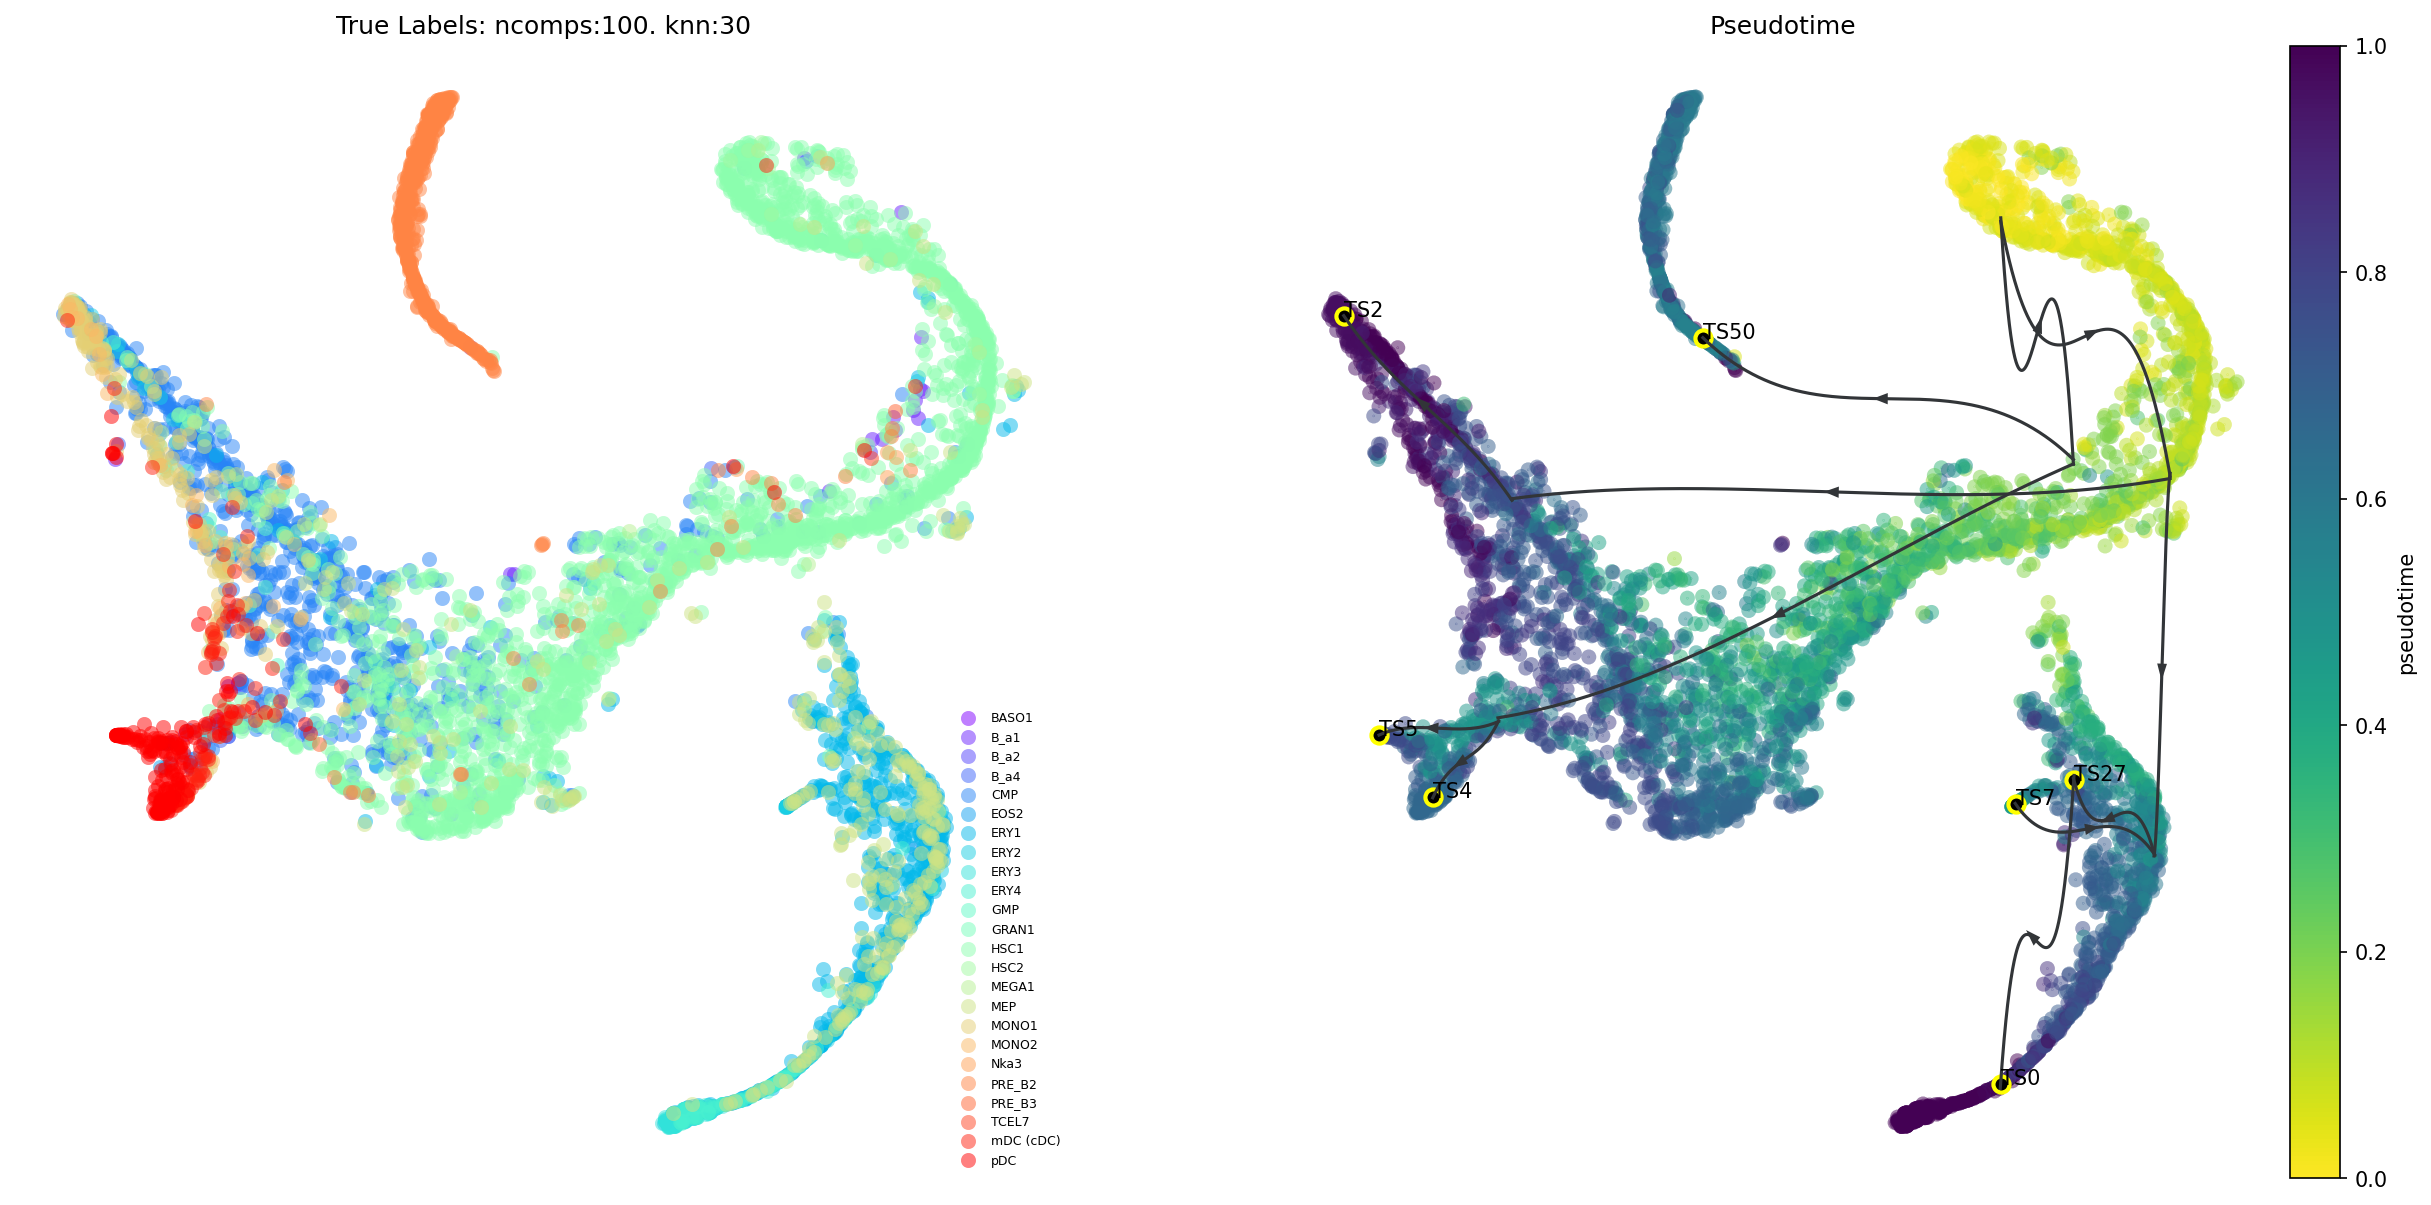

In [18]:
via.draw_trajectory_gams(via_coarse=v0, via_fine=v1, embedding=tsnem, draw_all_curves=False)